In [67]:
import numpy as np
import matplotlib.pylab as plt
import glob
from scipy import signal
import scipy

glob.glob('*')
plt.style.use(['fast','science'])

In [68]:
time, v1, v2 = np.genfromtxt('1_39/22_6355_19700128_073238.csv', comments ='%', delimiter = ',').T

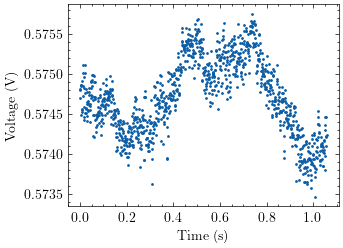

In [69]:
plt.scatter(time, v2, s = 1)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.savefig('../figures/moku_zigzag.pdf', format= 'pdf', bbox_inches = 'tight')

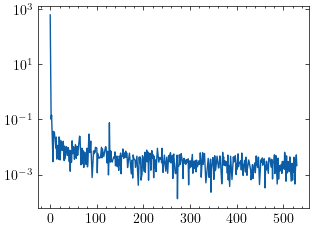

In [70]:
plt.plot(np.abs(np.fft.rfft(v2)))
plt.yscale('log')
# plt.xlim(40, 250)

In [71]:
time, v1, v2 = np.genfromtxt('1_39/22_652_19700128_073411.csv', comments ='%', delimiter = ',').T

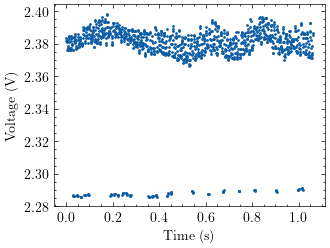

In [72]:
plt.scatter(time, v2, s = 1)
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.savefig('../figures/moku_floors.pdf', format= 'pdf', bbox_inches = 'tight')

In [ ]:
spacing  = np.median(np.diff(time))
freqs = np.fft.rfftfreq(len(time), spacing)
window = signal.windows.tukey(len(time), alpha = .3)
fft = np.fft.rfft(volt*window)
ps = np.abs(fft)**2

In [ ]:
plt.loglog(freqs, ps)

In [ ]:
smooth = scipy.ndimage.gaussian_filter1d(ps, sigma = 30)
plt.loglog(freqs[-100000:], smooth[-100000:], marker= 'o', ms = 1, ls = 'None')

In [ ]:
plt.hist(volt, bins = 400);

**Simply average over longer time (eg. 4 seconds, at 1 Mb/s). If the plots don't make sense to you, then hault the thing.
Convert files to npy and delete after saving the autocorrelation trace to save space.**

In [113]:
time, v2 = np.genfromtxt('double_peak_zoomed_3/11_672/0.csv', comments ='%', delimiter = ',').T

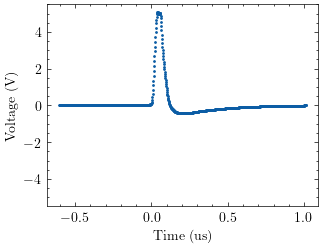

In [114]:
plt.scatter(time*1e6, v2, s = 1)
plt.xlabel('Time (us)')
plt.ylabel('Voltage (V)')
plt.ylim(-5.5,5.5)
plt.savefig('../figures/ringing.pdf', format= 'pdf')